# Childhood Cancer Mortality Trend 

The source URL for the data is 
https://www.cdc.gov/cancer/uscs/download_data.htm?CDC_AA_refVal=https%3A%2F%2Fwww.cdc.gov%2Fcancer%2Fnpcr%2Fuscs%2Fdownload_data.htm. 

This dataset is available to the general public through the website of the Centers for Disease Control. 
Accessing this data does not violate any laws. 
This specific dataset does not appear to have been previously analyzed based on a Google search. 

A preliminary survey of the data indicates there are 792 rows (summarized from a 22301 rows of original individual data), 10 columns, and the file is 49.7 kB. 

Based on my professional training and experience in microbiology and immunology, 
I am well equipped to analyze and develop hypotheses from my results. 
Hence, I hypothesize that the mortality associated with various childhood cancer types has decreased from 1999 to 2015. This is consistent with the advances in treatment and prevention over that same period. However, I will test the data available to see if that hypothesis is true.

As a backup if I encounter problems, there are multiple datasets on the CDC portal, expressed in different formats, available to the public. In addition, I can always access MEDLINEPLUS.gov to acquire the relevant data. 


In [1]:
#First, I will import Pandas to help with the analysis of the Excel data file.
import pandas as pd
pd.__version__

'0.23.0'

In [2]:
#Next, the Excel file will be assigned to a Pandas dataframe, 'dframe'.
dframe = pd.read_excel("childbyage_adj.xlsx")
dframe.head()

,AGE,AGE_ADJUSTED_CI_LOWER,AGE_ADJUSTED_CI_UPPER,AGE_ADJUSTED_RATE,COUNT,EVENT_TYPE,POPULATION,SITE,YEAR
0,0-14,0.3,0.4,0.3,194,Mortality,59955368,Acute Lymphocytic,1999
1,0-19,0.3,0.4,0.4,285,Mortality,80039970,Acute Lymphocytic,1999
2,0-14,3.4,3.7,3.5,2061,Incidence,58588724,Acute Lymphocytic,1999
3,0-19,2.9,3.1,3,2327,Incidence,78174581,Acute Lymphocytic,1999
4,0-14,0.2,0.3,0.2,141,Mortality,59955368,Acute Myeloid,1999


In [3]:
dframe

,AGE,AGE_ADJUSTED_CI_LOWER,AGE_ADJUSTED_CI_UPPER,AGE_ADJUSTED_RATE,COUNT,EVENT_TYPE,POPULATION,SITE,YEAR
0,0-14,0.3,0.4,0.3,194,Mortality,59955368,Acute Lymphocytic,1999
1,0-19,0.3,0.4,0.4,285,Mortality,80039970,Acute Lymphocytic,1999
2,0-14,3.4,3.7,3.5,2061,Incidence,58588724,Acute Lymphocytic,1999
3,0-19,2.9,3.1,3,2327,Incidence,78174581,Acute Lymphocytic,1999
4,0-14,0.2,0.3,0.2,141,Mortality,59955368,Acute Myeloid,1999
5,0-19,0.2,0.3,0.3,207,Mortality,80039970,Acute Myeloid,1999
6,0-14,0.6,0.8,0.7,398,Incidence,58588724,Acute Myeloid,1999
7,0-19,0.7,0.8,0.7,568,Incidence,78174581,Acute Myeloid,1999
8,0-14,2.4,2.6,2.5,1498,Mortality,59955368,All Cancer Sites Combined,1999
9,0-19,2.7,2.9,2.8,2243,Mortality,80039970,All Cancer Sites Combined,1999


I will now parse the Excel file using the boolean expressions available in Pandas.
As an example, I will first select one of the cancer SITES for analysis, namely "Acute Lymphocytic"
The "EVENT_TYPE" can be incidence (number of occurences) or mortality (number of deaths)
The age ranges are 0-14 or 0-19 respectively, presenting two important cut-off ages (14 vs. 19) for pediatric medicine.

In [4]:
cause =dframe['EVENT_TYPE']=="Incidence"
cancer =dframe['SITE']=="Acute Lymphocytic"
age_range1 =dframe['AGE']=="0-14"
age_range2 =dframe['AGE']=="0-19"
dframe[cancer & cause & age_range1]

,AGE,AGE_ADJUSTED_CI_LOWER,AGE_ADJUSTED_CI_UPPER,AGE_ADJUSTED_RATE,COUNT,EVENT_TYPE,POPULATION,SITE,YEAR
2,0-14,3.4,3.7,3.5,2061,Incidence,58588724,Acute Lymphocytic,1999
46,0-14,3.5,3.8,3.7,2146,Incidence,58914904,Acute Lymphocytic,2000
90,0-14,3.6,4,3.8,2254,Incidence,59815030,Acute Lymphocytic,2001
134,0-14,3.5,3.8,3.6,2173,Incidence,59931314,Acute Lymphocytic,2002
178,0-14,3.4,3.7,3.6,2150,Incidence,60628650,Acute Lymphocytic,2003
222,0-14,3.7,4,3.9,2333,Incidence,60651802,Acute Lymphocytic,2004
266,0-14,3.6,3.9,3.7,2256,Incidence,60519046,Acute Lymphocytic,2005
310,0-14,3.7,4,3.9,2347,Incidence,60516709,Acute Lymphocytic,2006
354,0-14,3.8,4.1,4,2425,Incidence,60681615,Acute Lymphocytic,2007
398,0-14,3.9,4.2,4.1,2505,Incidence,60907384,Acute Lymphocytic,2008


In [5]:
#I will assign a new dataframe that selects for this type cancer for incidence for ages 0-14.
ALC0_14_Incidence = dframe[cancer & cause & age_range1]

In [6]:
#The resulting dataframe needs to be cleaned up further as row index 574 contains data 
#for the years 2011-2015 instead of a single year.
ALC0_14_Incidence.drop([574])

,AGE,AGE_ADJUSTED_CI_LOWER,AGE_ADJUSTED_CI_UPPER,AGE_ADJUSTED_RATE,COUNT,EVENT_TYPE,POPULATION,SITE,YEAR
2,0-14,3.4,3.7,3.5,2061,Incidence,58588724,Acute Lymphocytic,1999
46,0-14,3.5,3.8,3.7,2146,Incidence,58914904,Acute Lymphocytic,2000
90,0-14,3.6,4,3.8,2254,Incidence,59815030,Acute Lymphocytic,2001
134,0-14,3.5,3.8,3.6,2173,Incidence,59931314,Acute Lymphocytic,2002
178,0-14,3.4,3.7,3.6,2150,Incidence,60628650,Acute Lymphocytic,2003
222,0-14,3.7,4,3.9,2333,Incidence,60651802,Acute Lymphocytic,2004
266,0-14,3.6,3.9,3.7,2256,Incidence,60519046,Acute Lymphocytic,2005
310,0-14,3.7,4,3.9,2347,Incidence,60516709,Acute Lymphocytic,2006
354,0-14,3.8,4.1,4,2425,Incidence,60681615,Acute Lymphocytic,2007
398,0-14,3.9,4.2,4.1,2505,Incidence,60907384,Acute Lymphocytic,2008


In [7]:
#I will assign a new dataframe that selects for this type cancer for incidence for ages 0-19.
ALC0_19_Incidence = dframe[cancer & cause & age_range2]

In [8]:
#The resulting dataframe needs to be cleaned up further as row index 575 contains data 
#for the years 2011-2015 instead of a single year.
ALC0_19_Incidence.drop([575])

,AGE,AGE_ADJUSTED_CI_LOWER,AGE_ADJUSTED_CI_UPPER,AGE_ADJUSTED_RATE,COUNT,EVENT_TYPE,POPULATION,SITE,YEAR
3,0-19,2.9,3.1,3,2327,Incidence,78174581,Acute Lymphocytic,1999
47,0-19,3,3.3,3.1,2466,Incidence,78714159,Acute Lymphocytic,2000
91,0-19,3.1,3.4,3.2,2560,Incidence,80042731,Acute Lymphocytic,2001
135,0-19,3,3.3,3.1,2501,Incidence,80317363,Acute Lymphocytic,2002
179,0-19,2.9,3.2,3,2451,Incidence,81425816,Acute Lymphocytic,2003
223,0-19,3.2,3.4,3.3,2674,Incidence,81754354,Acute Lymphocytic,2004
267,0-19,3.1,3.3,3.2,2587,Incidence,82005260,Acute Lymphocytic,2005
311,0-19,3.2,3.4,3.3,2705,Incidence,82324418,Acute Lymphocytic,2006
355,0-19,3.3,3.5,3.4,2798,Incidence,82749431,Acute Lymphocytic,2007
399,0-19,3.4,3.6,3.5,2879,Incidence,83118264,Acute Lymphocytic,2008


In [9]:
#Now, I will look at the mortality data resulting from Acute Lymphocytic Cancer.
death =dframe['EVENT_TYPE']=="Mortality"

In [10]:
#For ages 0-14, the data for mortality is as follows.
dframe[cancer & death & age_range1]

,AGE,AGE_ADJUSTED_CI_LOWER,AGE_ADJUSTED_CI_UPPER,AGE_ADJUSTED_RATE,COUNT,EVENT_TYPE,POPULATION,SITE,YEAR
0,0-14,0.3,0.4,0.3,194,Mortality,59955368,Acute Lymphocytic,1999
44,0-14,0.3,0.4,0.4,234,Mortality,60279841,Acute Lymphocytic,2000
88,0-14,0.3,0.4,0.3,208,Mortality,60450257,Acute Lymphocytic,2001
132,0-14,0.3,0.4,0.4,217,Mortality,60563030,Acute Lymphocytic,2002
176,0-14,0.4,0.5,0.4,246,Mortality,60628650,Acute Lymphocytic,2003
220,0-14,0.3,0.4,0.3,202,Mortality,60651802,Acute Lymphocytic,2004
264,0-14,0.3,0.4,0.3,188,Mortality,60519046,Acute Lymphocytic,2005
308,0-14,0.2,0.3,0.3,174,Mortality,60516709,Acute Lymphocytic,2006
352,0-14,0.3,0.4,0.4,212,Mortality,60681615,Acute Lymphocytic,2007
396,0-14,0.2,0.3,0.3,176,Mortality,60907384,Acute Lymphocytic,2008


In [11]:
#I now save this dataframe as follows for use later to plot the graphics related to this study.
ALC0_14_Mortality = dframe[cancer & death & age_range1]

In [12]:
#The resulting dataframe needs to be cleaned up further as row index 572 contains data 
#for the years 2011-2015 instead of a single year.
ALC0_14_Mortality.drop([572])

,AGE,AGE_ADJUSTED_CI_LOWER,AGE_ADJUSTED_CI_UPPER,AGE_ADJUSTED_RATE,COUNT,EVENT_TYPE,POPULATION,SITE,YEAR
0,0-14,0.3,0.4,0.3,194,Mortality,59955368,Acute Lymphocytic,1999
44,0-14,0.3,0.4,0.4,234,Mortality,60279841,Acute Lymphocytic,2000
88,0-14,0.3,0.4,0.3,208,Mortality,60450257,Acute Lymphocytic,2001
132,0-14,0.3,0.4,0.4,217,Mortality,60563030,Acute Lymphocytic,2002
176,0-14,0.4,0.5,0.4,246,Mortality,60628650,Acute Lymphocytic,2003
220,0-14,0.3,0.4,0.3,202,Mortality,60651802,Acute Lymphocytic,2004
264,0-14,0.3,0.4,0.3,188,Mortality,60519046,Acute Lymphocytic,2005
308,0-14,0.2,0.3,0.3,174,Mortality,60516709,Acute Lymphocytic,2006
352,0-14,0.3,0.4,0.4,212,Mortality,60681615,Acute Lymphocytic,2007
396,0-14,0.2,0.3,0.3,176,Mortality,60907384,Acute Lymphocytic,2008


In [13]:
#For ages 0-19, the data for mortality is as follows to be used for plotting the graphics later.
ALC0_19_Mortality =dframe[cancer & death & age_range2]

In [14]:
#The resulting dataframe needs to be cleaned up further as row index 573 contains data 
#for the years 2011-2015 instead of a single year.
ALC0_19_Mortality.drop([573])

,AGE,AGE_ADJUSTED_CI_LOWER,AGE_ADJUSTED_CI_UPPER,AGE_ADJUSTED_RATE,COUNT,EVENT_TYPE,POPULATION,SITE,YEAR
1,0-19,0.3,0.4,0.4,285,Mortality,80039970,Acute Lymphocytic,1999
45,0-19,0.4,0.5,0.4,332,Mortality,80574796,Acute Lymphocytic,2000
89,0-19,0.3,0.4,0.4,313,Mortality,80906541,Acute Lymphocytic,2001
133,0-19,0.4,0.4,0.4,323,Mortality,81173400,Acute Lymphocytic,2002
177,0-19,0.4,0.4,0.4,328,Mortality,81425816,Acute Lymphocytic,2003
221,0-19,0.3,0.4,0.4,295,Mortality,81754354,Acute Lymphocytic,2004
265,0-19,0.3,0.4,0.3,267,Mortality,82005260,Acute Lymphocytic,2005
309,0-19,0.3,0.4,0.3,266,Mortality,82324418,Acute Lymphocytic,2006
353,0-19,0.3,0.4,0.4,294,Mortality,82749431,Acute Lymphocytic,2007
397,0-19,0.3,0.3,0.3,253,Mortality,83118264,Acute Lymphocytic,2008


In [15]:
#I will now save the cleaned-up dataframe as follows for use in Matplotlib.
df1=ALC0_19_Mortality.drop([573])

In [16]:
#I will use Matplotlib to plot the graphics.
import matplotlib
matplotlib.__version__

'2.2.2'

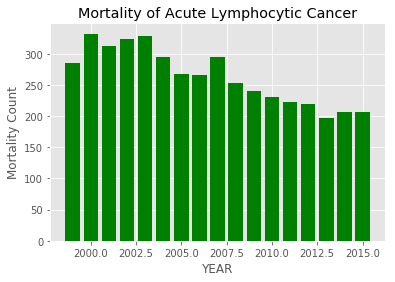

In [17]:
#Now, we will first just look at the mortality trend of Acute Lymphotic Cancer for ages 0 to 14.
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

x = df1["YEAR"]
y = df1["COUNT"]


plt.bar(x, y, color='green')
plt.xlabel("YEAR")
plt.ylabel("Mortality Count")
plt.title("Mortality of Acute Lymphocytic Cancer")

plt.show()

#The plot shows a general decline in mortality of this cancer for this age group from 1999 to 2015. 
#The result here supports the hypothesis that mortality has decreased over time.

In [18]:
df2 = ALC0_14_Mortality.drop([572])

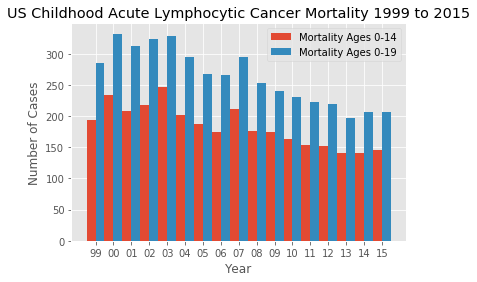

In [19]:
#Now, I will use Numpy to help with plotting comparison bar charts.

import numpy as np

N = 17
Mort14 = df2["COUNT"]
Mort19 = df1["COUNT"]

ind = np.arange(N) 
width = .5       
plt.bar(ind, Mort14, width, label='Mortality Ages 0-14')
plt.bar(ind + width, Mort19, width,
    label='Mortality Ages 0-19')

plt.ylabel('Number of Cases')
plt.xlabel('Year')
plt.title('US Childhood Acute Lymphocytic Cancer Mortality 1999 to 2015')

plt.xticks(ind + width / 2, ('99', '00', '01', '02', '03', '04', 
                             '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15'))
plt.legend(loc='best')
plt.show()

#The following shows the mortality trend of Acute Lymphotic Cancer for ages 0-14 and 0-19 from 1999 to 2015.
#Again, the general trend tends to show a decrease even though 2007 seems to be an anomaly. 
#Also, there seems to be a plateau of the trend in 2014 and 2015.
#The general shape of the bar charts still supports the hypothesis.

So far, we have only looked at the absolute number of deaths. To give a more useful picture of what was going on, 
we should look at "age adjusted rates" instead. The age-adjusted rates are rates that would have existed if the population under study had the same age distribution as the "standard" population. Therefore, they are summary measures adjusted for differences in age distributions.

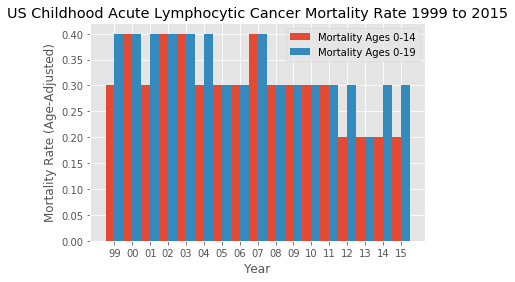

In [20]:
N = 17
Mort14 = df2["AGE_ADJUSTED_RATE"]
Mort19 = df1["AGE_ADJUSTED_RATE"]

ind = np.arange(N) 
width = .5       
plt.bar(ind, Mort14, width, label='Mortality Ages 0-14')
plt.bar(ind + width, Mort19, width,
    label='Mortality Ages 0-19')

plt.ylabel('Mortality Rate (Age-Adjusted)')
plt.xlabel('Year')
plt.title('US Childhood Acute Lymphocytic Cancer Mortality Rate 1999 to 2015')

plt.xticks(ind + width / 2, ('99', '00', '01', '02', '03', '04', 
                             '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15'))
plt.legend(loc='best')
plt.show()



The above graph shows us a different picture than the one shown by looking at the death counts alone. 
While there was an overall drop in the mortality rates for ages 0-14, especially from 2011 onwards, the pattern for ages 0-19 is harder to conclude. There was a marked drop from 2012 to 2013 (from 0.30 to 0.20) However, there was an increase after that. 

Computation: (Ref: https://health.mo.gov/data/mica/CDP_MICA/AARate.html)
An example of the computation of an age-adjusted death rate (AADR) follows:
The rate in the area of study (e.g., county, state) is computed for each age group noted in the table below by dividing the number of events (deaths) in that age group by the estimated population of the same age group in that area and then multiplying by a constant of 100,000. This results in an age-specific death rate (ASDR) per 100,000 population for each age group. That is, for each age group, ASDR = deaths in age group ÷ estimated population of that age group × 100,000.
Each ASDR is then multiplied by the proportion of the standard population (see table below) that same age group. The age-specific results are summed to get the age-adjusted death rate for the area of study. The formula is:
     AADR = Summation of (ASDR X standard proportion) 

Next, I will show the age-adjusted mortality rates for all the cancer sites combined, using the same methodology shown above.

In [21]:
all_cancers =dframe['SITE']=="All Cancer Sites Combined"

In [22]:
all_sites1 = dframe[all_cancers & death & age_range1]
dframe[all_cancers & death & age_range1]

,AGE,AGE_ADJUSTED_CI_LOWER,AGE_ADJUSTED_CI_UPPER,AGE_ADJUSTED_RATE,COUNT,EVENT_TYPE,POPULATION,SITE,YEAR
8,0-14,2.4,2.6,2.5,1498,Mortality,59955368,All Cancer Sites Combined,1999
52,0-14,2.4,2.7,2.5,1526,Mortality,60279841,All Cancer Sites Combined,2000
96,0-14,2.4,2.6,2.5,1494,Mortality,60450257,All Cancer Sites Combined,2001
140,0-14,2.4,2.7,2.6,1548,Mortality,60563030,All Cancer Sites Combined,2002
184,0-14,2.4,2.7,2.5,1543,Mortality,60628650,All Cancer Sites Combined,2003
228,0-14,2.3,2.6,2.5,1492,Mortality,60651802,All Cancer Sites Combined,2004
272,0-14,2.3,2.5,2.4,1452,Mortality,60519046,All Cancer Sites Combined,2005
316,0-14,2.1,2.4,2.2,1360,Mortality,60516709,All Cancer Sites Combined,2006
360,0-14,2.2,2.4,2.3,1395,Mortality,60681615,All Cancer Sites Combined,2007
404,0-14,2.1,2.3,2.2,1354,Mortality,60907384,All Cancer Sites Combined,2008


In [23]:
all_sites1.drop([580])

,AGE,AGE_ADJUSTED_CI_LOWER,AGE_ADJUSTED_CI_UPPER,AGE_ADJUSTED_RATE,COUNT,EVENT_TYPE,POPULATION,SITE,YEAR
8,0-14,2.4,2.6,2.5,1498,Mortality,59955368,All Cancer Sites Combined,1999
52,0-14,2.4,2.7,2.5,1526,Mortality,60279841,All Cancer Sites Combined,2000
96,0-14,2.4,2.6,2.5,1494,Mortality,60450257,All Cancer Sites Combined,2001
140,0-14,2.4,2.7,2.6,1548,Mortality,60563030,All Cancer Sites Combined,2002
184,0-14,2.4,2.7,2.5,1543,Mortality,60628650,All Cancer Sites Combined,2003
228,0-14,2.3,2.6,2.5,1492,Mortality,60651802,All Cancer Sites Combined,2004
272,0-14,2.3,2.5,2.4,1452,Mortality,60519046,All Cancer Sites Combined,2005
316,0-14,2.1,2.4,2.2,1360,Mortality,60516709,All Cancer Sites Combined,2006
360,0-14,2.2,2.4,2.3,1395,Mortality,60681615,All Cancer Sites Combined,2007
404,0-14,2.1,2.3,2.2,1354,Mortality,60907384,All Cancer Sites Combined,2008


In [24]:
df3=all_sites1.drop([580])

In [25]:
all_sites2 = dframe[all_cancers & death & age_range2]
dframe[all_cancers & death & age_range2]

,AGE,AGE_ADJUSTED_CI_LOWER,AGE_ADJUSTED_CI_UPPER,AGE_ADJUSTED_RATE,COUNT,EVENT_TYPE,POPULATION,SITE,YEAR
9,0-19,2.7,2.9,2.8,2243,Mortality,80039970,All Cancer Sites Combined,1999
53,0-19,2.7,2.9,2.8,2271,Mortality,80574796,All Cancer Sites Combined,2000
97,0-19,2.6,2.9,2.8,2226,Mortality,80906541,All Cancer Sites Combined,2001
141,0-19,2.7,2.9,2.8,2271,Mortality,81173400,All Cancer Sites Combined,2002
185,0-19,2.6,2.9,2.7,2233,Mortality,81425816,All Cancer Sites Combined,2003
229,0-19,2.6,2.8,2.7,2223,Mortality,81754354,All Cancer Sites Combined,2004
273,0-19,2.5,2.8,2.7,2183,Mortality,82005260,All Cancer Sites Combined,2005
317,0-19,2.4,2.6,2.5,2035,Mortality,82324418,All Cancer Sites Combined,2006
361,0-19,2.4,2.6,2.5,2068,Mortality,82749431,All Cancer Sites Combined,2007
405,0-19,2.3,2.5,2.4,2039,Mortality,83118264,All Cancer Sites Combined,2008


In [26]:
all_sites2.drop([581])

,AGE,AGE_ADJUSTED_CI_LOWER,AGE_ADJUSTED_CI_UPPER,AGE_ADJUSTED_RATE,COUNT,EVENT_TYPE,POPULATION,SITE,YEAR
9,0-19,2.7,2.9,2.8,2243,Mortality,80039970,All Cancer Sites Combined,1999
53,0-19,2.7,2.9,2.8,2271,Mortality,80574796,All Cancer Sites Combined,2000
97,0-19,2.6,2.9,2.8,2226,Mortality,80906541,All Cancer Sites Combined,2001
141,0-19,2.7,2.9,2.8,2271,Mortality,81173400,All Cancer Sites Combined,2002
185,0-19,2.6,2.9,2.7,2233,Mortality,81425816,All Cancer Sites Combined,2003
229,0-19,2.6,2.8,2.7,2223,Mortality,81754354,All Cancer Sites Combined,2004
273,0-19,2.5,2.8,2.7,2183,Mortality,82005260,All Cancer Sites Combined,2005
317,0-19,2.4,2.6,2.5,2035,Mortality,82324418,All Cancer Sites Combined,2006
361,0-19,2.4,2.6,2.5,2068,Mortality,82749431,All Cancer Sites Combined,2007
405,0-19,2.3,2.5,2.4,2039,Mortality,83118264,All Cancer Sites Combined,2008


In [27]:
df4=all_sites2.drop([581])

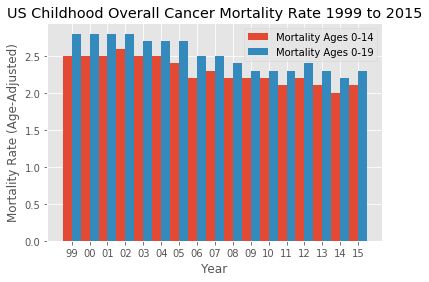

In [28]:
N = 17
AllMort14 = df3["AGE_ADJUSTED_RATE"]
AllMort19 = df4["AGE_ADJUSTED_RATE"]

ind = np.arange(N) 
width = .5       
plt.bar(ind, AllMort14, width, label='Mortality Ages 0-14')
plt.bar(ind + width, AllMort19, width,
    label='Mortality Ages 0-19')

plt.ylabel('Mortality Rate (Age-Adjusted)')
plt.xlabel('Year')
plt.title('US Childhood Overall Cancer Mortality Rate 1999 to 2015')

plt.xticks(ind + width / 2, ('99', '00', '01', '02', '03', '04', 
                             '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15'))
plt.legend(loc='best')
plt.show()


Conclusions: The mortality rates for childhood cancers in the US have experienced an overall declining trend from 1999 to 2015, especially when we compared the rates in 1999 with the rates in 2015. However, from year to year, there is no absolutely declining pattern. For instance, the rates have increased from 2014 to 2015. The hypothesis is still supported by the overall trend. 

Through this midterm project, I have come to see how the merging of several fields -- namely, math and statistics, epidemiology, and computer science -- gives rise the practice of data science. Thank you very much for the experience and support!